* Importing Liberaries  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings as w
w.filterwarnings("ignore")

* Loading dataset

In [2]:
path = "G:\\Data Field\\D..S..Course\\data.sc.Asem\\Data\Data\\2.9 Ensemble Reg\\data.csv"
data = pd.read_csv(path)
data

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


* Present data Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


* Present the Description of data

In [4]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


* Present correlation columns

In [5]:
C_M =data.corr()
C_M

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


* Get the 10 Strong feature with acual output

In [6]:
k = 5
S_C_M = C_M.nlargest( k , "actual")["actual"].index
S_C_M

Index(['actual', 'temp_1', 'average', 'forecast_acc', 'forecast_under'], dtype='object')

In [7]:
cols = np.corrcoef(data[S_C_M].values.T)

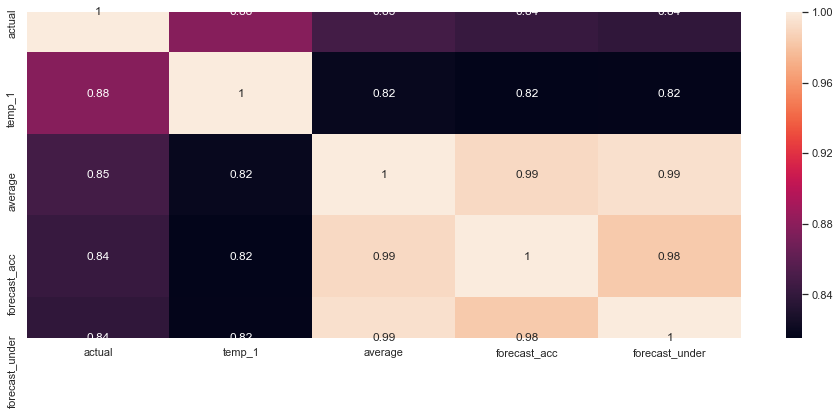

In [8]:
sns.set(font_scale = 1)
f3 , ax3 = plt.subplots(figsize= (16,6))
fig3 = sns.heatmap(cols , annot = True , xticklabels = S_C_M.values , yticklabels = S_C_M.values  )

* Get The probaplity oF Coreelation data

In [9]:
cols = np.corrcoef(data[S_C_M].values.T)
cols

array([[1.        , 0.87787978, 0.84836538, 0.84213508, 0.83894619],
       [0.87787978, 1.        , 0.8193281 , 0.81516248, 0.81594285],
       [0.84836538, 0.8193281 , 1.        , 0.99070465, 0.99437313],
       [0.84213508, 0.81516248, 0.99070465, 1.        , 0.98391028],
       [0.83894619, 0.81594285, 0.99437313, 0.98391028, 1.        ]])

* Present Visualize Corelation

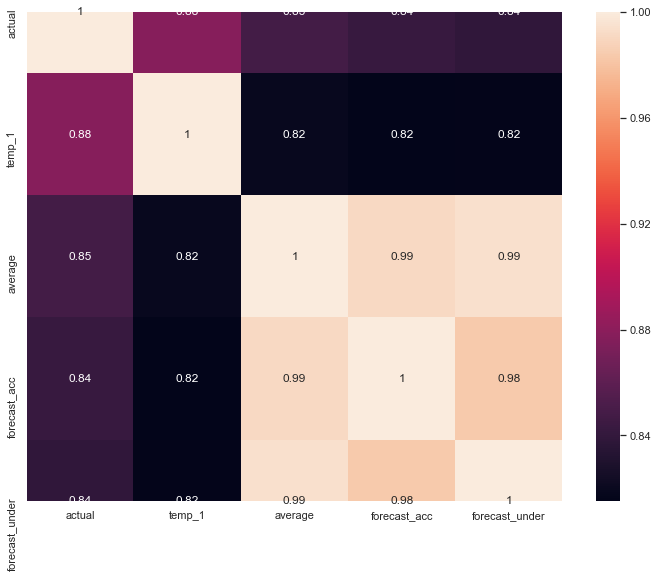

In [10]:
f4 , ax4 = plt.subplots(figsize = (12,9))

fig4 = sns.heatmap(cols , annot = True , xticklabels= S_C_M.values , yticklabels = S_C_M.values )


* Present Visualize Mong Features and Output

In [11]:
v1 = "temp_1"
v2 = "average"
v3 = "forecast_acc"
v4 = "forecast_under"


data1 = pd.concat([data["actual"] , data[v1]] , axis = 1)
data2 = pd.concat([data["actual"] , data[v2]] , axis = 1)
data3 = pd.concat([data["actual"] , data[v3]] , axis = 1)
data4 = pd.concat([data["actual"] , data[v4]] , axis = 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


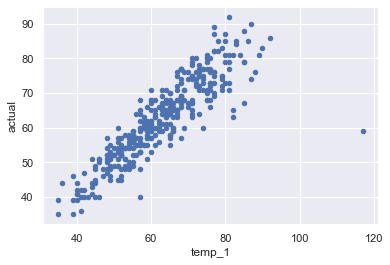

In [12]:
data1.plot.scatter( x = v1, y = "actual" )  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


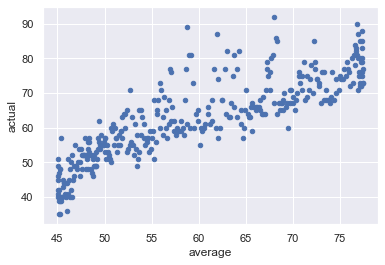

In [13]:
data2.plot.scatter( x = v2 , y = "actual")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


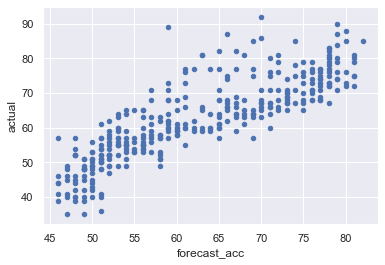

In [14]:
data3.plot.scatter( x = v3 , y = "actual")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


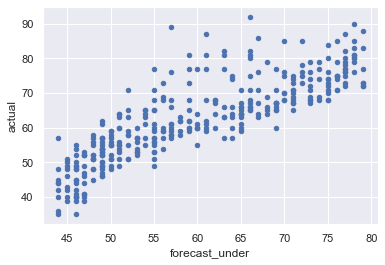

In [15]:
data4.plot.scatter( x = v4 , y = "actual")

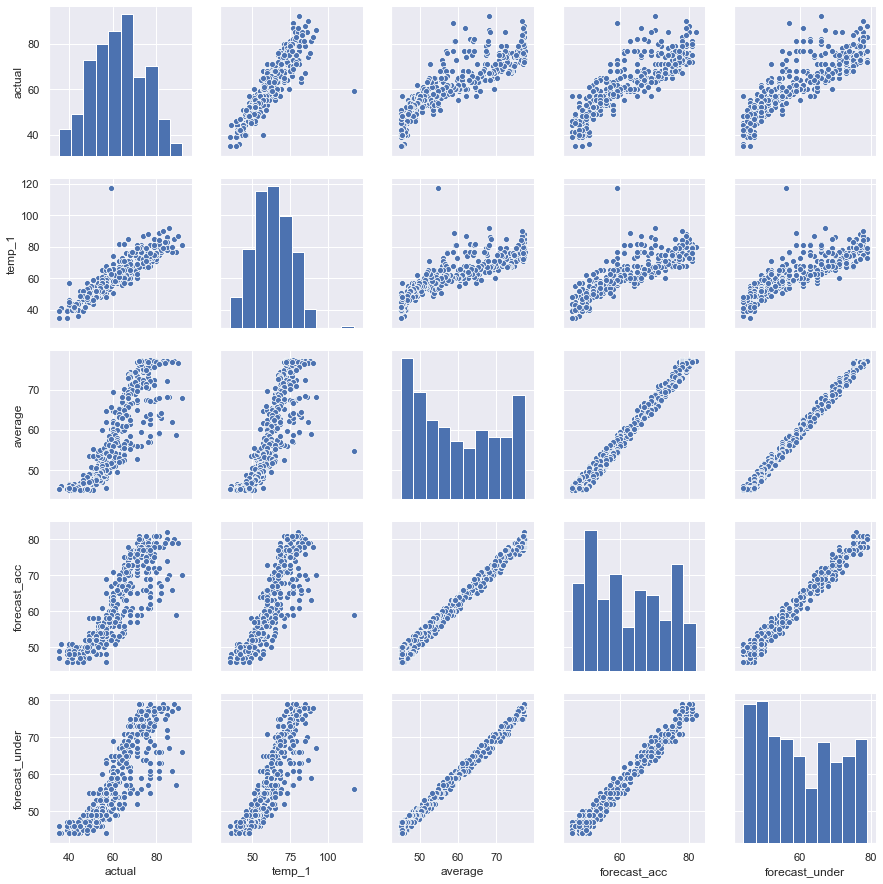

In [16]:
columns = ['actual', 'temp_1', 'average', 'forecast_acc', 'forecast_under']
sns.pairplot(data[columns])

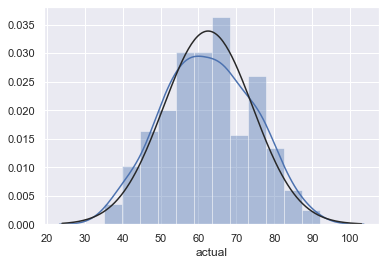

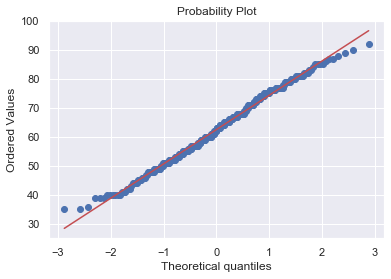

In [17]:
sns.distplot(data["actual"] , fit = norm)
f1 = plt.figure()
res = stats.probplot( data["actual"] ,   plot = plt)


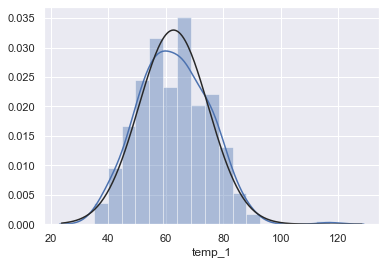

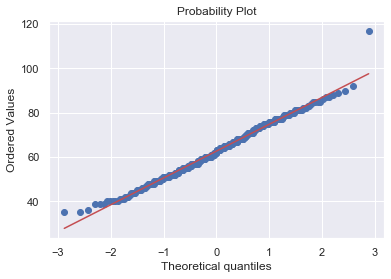

In [18]:
sns.distplot(data["temp_1"] , fit = norm)
f1 = plt.figure()
res = stats.probplot( data["temp_1"] ,   plot = plt)


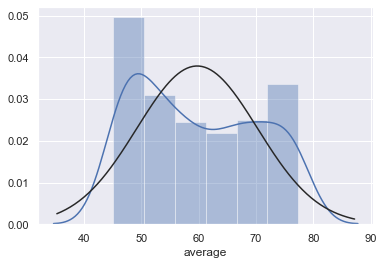

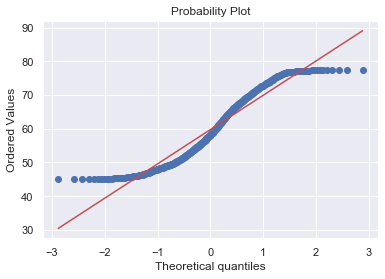

In [19]:
sns.distplot(data["average"] , fit = norm)
f = plt.figure()
res = stats.probplot(data["average"] , plot = plt)

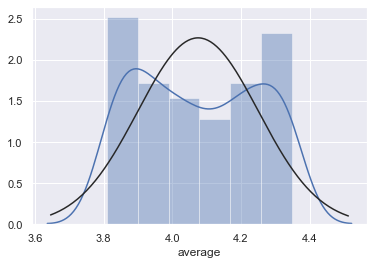

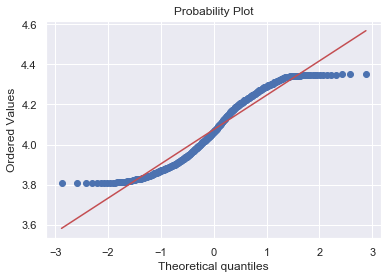

In [20]:
data["average"] = np.log(data["average"] )
sns.distplot(data["average"] , fit = norm)
f = plt.figure()
res = stats.probplot(data["average"] , plot = plt)